Are there characteristics (concreteness, valency) of a sentence that makes it more memorable than other sentences?

Let's first explore each sentences':
* (1) Position in a passage - as defined by idea units
* (2) Text Properties - as defined by Coh-metrix
* (3) Structural significance in a passage - as defined by Wordbase model

and how it relates to that idea unit's memorability.

## (0) Distribution of Recall Probabilities

In [ ]:
# (0) Load in scored free recall data
import pandas as pd
df = pd.read_csv("psifr_al1.csv")

Text(0.5, 1.0, 'Distribution of Recall Probabilities')

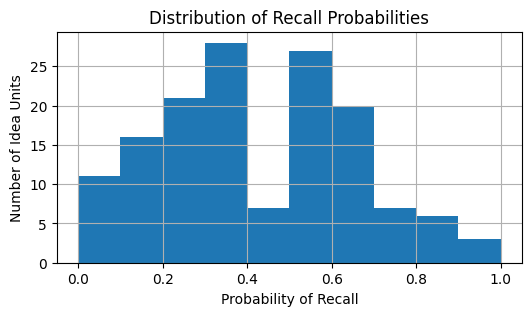

In [ ]:
rec_prob = df[["item_string", "recall"]].groupby("item_string").mean()  # This is a dataframe indexed by values of a column3
g = rec_prob.hist(bins=10, figsize=(6,3))
plt.xlabel("Probability of Recall")
plt.ylabel("Number of Idea Units")
plt.title(f"Distribution of Recall Probabilities")

`Data Science Tip: Thinking Clearly`

* There are tons of different words we can use to descibe the data frame below, and there isn't one correct description but many, what's important is choosing a vocabulary that is useful.

* Each row of a df is a data point. Each column is a distribution of values a variable takes on. We can use a groupby to separate the data points into group and then perform computations on those (e.g. finding the mean value that a variable takes on within each group)
  * Computationally, `.groupby()` is a method that returns a group by object. Then you can call a method (`.mean()`) on groupby object to compute mean for each group

In [ ]:
import matplotlib.pyplot as plt
# (1) Get recall probability
rec_prob = df[["item_string", "recall"]].groupby("item_string").mean()  # This is a dataframe indexed by values of a column3

It almost looks like there are two group of idea units, ones that have low recall (.4<) and ones that have high recall probabilities (>.5 )

`Data Science Tip: Start at the Beginning`

* When performing an operation to data points (like separating idea units based on passage), try to do it as early as possible, so it is simple to do.

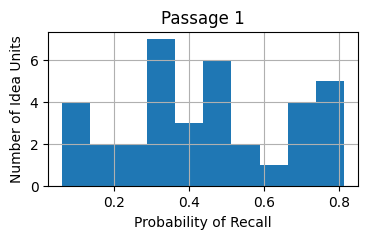

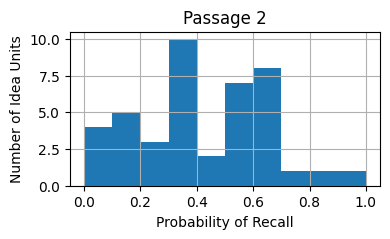

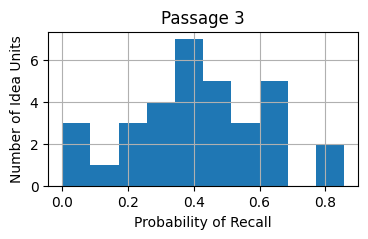

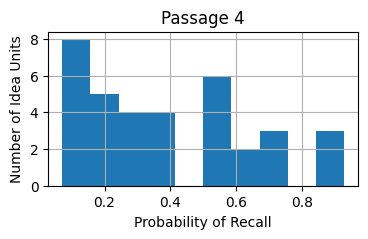

In [ ]:
for i in range(1,5):
    new_df = df.query("passage == "+ str(i))
    rec_prob = new_df[["item_string", "recall"]].groupby("item_string").mean()  # This is a dataframe indexed by values of a column3
    g = rec_prob.hist(bins=10, figsize=(4,2))
    plt.xlabel("Probability of Recall")
    plt.ylabel("Number of Idea Units")
    plt.title(f"Passage {i}")

It is interesting that the distribution of recall probabilities for passage 4 is skewed to the left. 

* This might be because Passage 4 has text with [super low arousal and valence.](https://vanderbilt365-my.sharepoint.com/personal/katherine_aboud_vanderbilt_edu/_layouts/15/onedrive.aspx?q=coh%2Dmetrix&searchScope=folder&id=%2Fpersonal%2Fkatherine%5Faboud%5Fvanderbilt%5Fedu%2FDocuments%2FDesktop%2FTeam%2FProjects%2FAL1%5FNIH%5FDP5%2FAL1%5FMethods%5FNIH%2FAL1%5FStimuli%2FPassages%5FMaster%5FDP5%5FListB%2FStimuli%5Fcheck%5Fdp5%5FlistB%5Fgrade5%2Epdf&parent=%2Fpersonal%2Fkatherine%5Faboud%5Fvanderbilt%5Fedu%2FDocuments%2FDesktop%2FTeam%2FProjects&parentview=7). The link was part of validation analysis after creating the passages to ensure that the passages are equally memorable.
* It seems like mediating these effects were successful, that the mean amount of information recalled for each passage is around the same.

In [ ]:
# let's check out the mean amount information recalled from each passage
means = []

for i in range(1,5):
    new_df = df.query("passage == "+str(i))
    means.append(new_df['recall'].mean())

print(means)

[0.4409722222222222, 0.421875, 0.4222689075630252, 0.39591836734693875]


## (1) Position vs Recall Probability

Let's begin by looking at serial position curves.

In [4]:
# (0) Load in scored free recall data
import pandas as pd
from psifr import fr
import matplotlib.pyplot as plt
df = pd.read_csv("psifr_al1.csv")

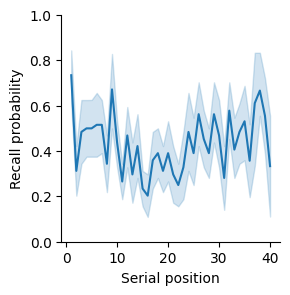

In [5]:
# (1) Use psifr to create a serial position curve for all the participants and all the passages
spc = fr.spc(df)
fr.plot_spc(recall=spc) # fr.plot_spc(recall=spc, col='subject', col_wrap=5)

Wow, this `spc` takes a really wonky shape (not U-shaped).

 It seems like serial position is not the only factor at play when comes to the memorability of a piece of information in a passage.

 * How about we look at the serial position curves for each individual passage?

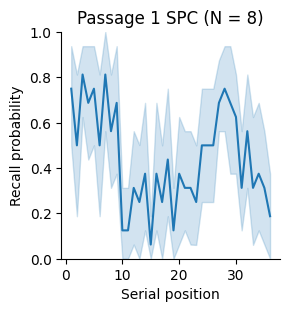

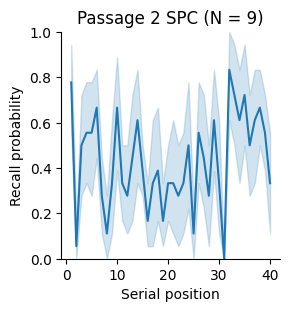

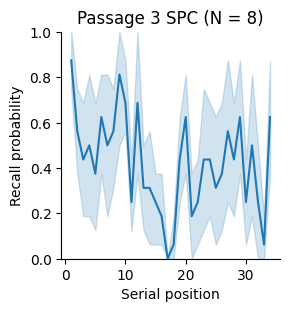

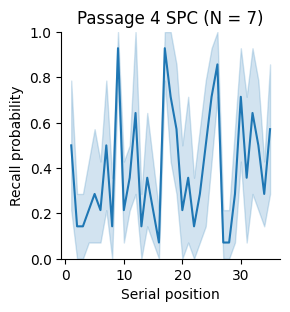

In [6]:
# Iterate over the four passages
for i in range(1, 5):
    passage = i
    df_pas_i = df.query("passage == " + str(i))
    spc = fr.spc(df_pas_i)
    fr.plot_spc(recall=spc)
    plt.title(f"Passage {i} SPC (N = {len(df_pas_i['subject'].unique())})")



In some passages, there seem to be a serial position effect (passage 1,2), but definitely not in others (passage 4)

Let's check out which idea units were really memorable, and which were not visually.

In [7]:
passage = 2

df_pas_i = df.query("passage == " + str(passage))
participants = df_pas_i["subject_id"].value_counts()
n_idea_units = df_pas_i["input"].max()
idea_units = df_pas_i["item_string"].values[:n_idea_units]

idea_units
spc = fr.spc(df_pas_i)
table = spc[["input","recall"]].groupby("input").mean()
table["idea_units"] = idea_units
print(participants)
table


subject_id
AL1001    80
AL1002    80
AL1005    80
AL1006    80
AL1011    80
AL1018    80
AL1025    80
AL1031    80
AL1034    80
Name: count, dtype: int64


,recall,idea_units
input,,
1,0.777778,"To begin, determine cause and severity of casu..."
2,0.055556,Determine if they were exposed to
3,0.500000,"smoke, steam, or combustion products."
4,0.555556,Possible causes include
5,0.555556,"open flame, hot liquid, chemicals, or electric..."
6,0.666667,Explosions and lightning
7,0.277778,may cause burn and additional injury.
8,0.111111,These injuries may include
9,0.333333,"internal injury, fracture, or spinal injury."


## (2) Text Characteristics

I want to create a plot where each point represents an idea unit, independent variables are text-features, dependent variable memorability.

It turns out we don't need to use Coh-metrix to find the arousal and valence of each word (in fact it is not a component). 

* Instead we can use this [word pool](https://link.springer.com/article/10.3758/s13428-012-0314-x) created from the responses of online raters that quantified the valence, arousal, dominance of 13,000 english words
  * The word pool can be downloaded from electronic supplementary material

### (2.1) Word Pool

In [1]:
# (0) Create "word pool" df and list
import pandas as pd

word_pool_df = pd.read_excel("Arousal and Valence Word Pool.xlsx")
word_pool_df = word_pool_df[["Word", "V.Mean.Sum", "A.Mean.Sum"]]
word_pool_df = word_pool_df.rename(columns={"V.Mean.Sum":"Valence", "A.Mean.Sum": "Arousal"})

word_pool = word_pool_df['Word'].to_list()

word_pool_df.head()

,Word,Valence,Arousal
0,aardvark,6.26,2.41
1,abalone,5.30,2.65
2,abandon,2.84,3.73
3,abandonment,2.63,4.95
4,abbey,5.85,2.20


`Data Science Tip - Here what the creators have to say` 
* When trying to find out about a function or method of an object in a library, always see what it's creators had to say about it in it in it's **documentation**. Here is an example of the result for histograms.

* Stack Overflow is also a helpful tool, from here I learned you can access a df row using `iloc`, and column using a column name.

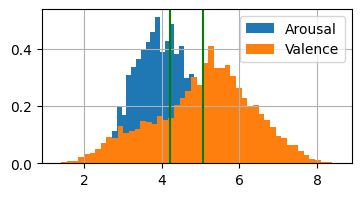

In [2]:
# Let's take a look at how the valence and arousal scores are distributed
import matplotlib.pyplot as plt
word_pool_df['Arousal'].hist(bins=50, figsize=(4,2), density=True, histtype="stepfilled", label="Arousal")
plt.axvline(x=word_pool_df['Arousal'].mean(), color="g");
word_pool_df['Valence'].hist(bins=50, figsize=(4,2),density=True,  histtype="stepfilled", label="Valence")
plt.axvline(x=word_pool_df['Valence'].mean(), color="g");
plt.legend();


* Examining the distributions of scores, it looks like people found the word on average more boring than interesting with arousal, whereas valence scores seems to be more symmetric in terms of positive and negative scores.

### (2.2) Valence and Arousal Scoring

Now, using this word pool, we can assign an arousal and associated valence to each idea unit.

`NLP Algorithms - Stemming`
* Stemming refers to the process of transforming word into its word stem, the part of a word that gives it it's meaning.
* The stem does not have to be a real word
* The most popular stemming algorithm is the Porter algorithm

In [5]:
import string
import json
import numpy as np
# from nltk.stem import PorterStemmer
with open("equivalent_words_cohmetrix.json","r") as dic:
    equivalence_dict = json.load(dic)

# (0) Load in Data
df = pd.read_csv("psifr_al1.csv")

# (1) Calculate the recall probability of each item_string
item_string_df = df[["item_string", "recall"]].groupby(by="item_string").mean()
item_string_df

#(2) Assign an arousal to each item_string
item_strings = item_string_df.index.to_list()
item_strings = [item_string.translate(str.maketrans('', '', string.punctuation)) for item_string in item_strings]
item_strings = [item_string.lower() for item_string in item_strings]

arousal_lst = []
valence_lst = []
emotional_power_lst = []
not_in_word_pool = []

for item_string in item_strings:
    max_arousal = []
    min_valence = []
    emotional_power = [] 

    for word in item_string.split():   # Changing numbers so we can account for their valence
        if word == "18":
            word = "eighteen"
        elif word == "9":
            word = "nine"
        elif word == "36":
            word = "thirty"        # both 'thirty' and 'six' have similar valence and arousal
        elif word == "600":
            word = "hundred"

        # if word not in word_pool:
        #     ps = PorterStemmer()
        #     word = ps.stem(word)
        if word in equivalence_dict:
            word = equivalence_dict[word]

        if word not in word_pool:       # If word is still not in word_pool
            not_in_word_pool.append(word)
        else:
            arousal = word_pool_df.loc[word_pool_df['Word'] == word].iloc[0]["Arousal"]
            valence = word_pool_df.loc[word_pool_df['Word'] == word].iloc[0]["Valence"]
            emotional_pow = np.abs(5-arousal) + np.abs(5-valence)
            max_arousal.append(arousal)
            min_valence.append(valence)
            emotional_power.append(emotional_pow)
            


        ## Here is the challenge (How do we look up to see if a particular word is in the word pool)
        ## Account for tense of words (might have to manually do this!)

    if len(max_arousal) == 0:
        arousal_lst.append("NA")
    else:
        arousal_lst.append(max(max_arousal))
        valence_lst.append(min(min_valence))
        emotional_power_lst.append(max(emotional_power))
    
item_string_df["max_arousal"] = arousal_lst
item_string_df["min_valence"] = valence_lst
item_string_df["emotional_power"] = emotional_power_lst

# item_string_df[item_string_df["max_arousal"] == "NA"]

item_string_df.sort_values(by=["min_valence"],inplace=True)
item_string_df.head(1)

,recall,max_arousal,min_valence,emotional_power
item_string,,,,
The Glasgow Coma Scale looks at,0.857143,3.8,1.89,5.06


`Data Science Tip - 'Explain Yourself' (with Documentation)`
* For every large piece of code you create -- module, script, class, function -- write a short explanation of what that code does and why you created it (I am working on animating data points right now)

In [6]:
# In order to create the animation, I will need all the relevant information to plot the points
## Columns - Arousal, Recall Probabilities, Idea Units, 


# (0) create a dictionary that associates each idea unit with a passage (will used later on)
item_to_passage_dict = {}
item_string_lst = df["item_string"].to_list()
passage_lst = df["passage"].to_list()

for i, item in enumerate(item_string_lst):
    item_to_passage_dict[item] = passage_lst[i]

print(item_to_passage_dict)

# (1) create a list that pairs each item_string in df with a passage
passage_lst = []
for item in item_string_df.index.to_list():
    passage_lst.append(item_to_passage_dict[item])

item_string_df["passage"] = passage_lst


# (2) Save resulting dataframe to csv
item_string_df.to_csv("idea_units_arous_and_valence.csv")


{'Smaller and larger abscesses ': 1, 'may require different methods for treatment. ': 1, 'Smaller abscesses are ': 1, 'typically less than five millimeters wide. ': 1, 'Applying warm soaks can ': 1, 'promote pus straining in smaller abscesses.   ': 1, 'Larger abscesses will ': 1, 'require an incision ': 1, 'to strain them.   ': 1, 'Signs of larger abscesses include': 1, 'increased inflammation and pus collection. ': 1, 'Ensure the appropriate precautions are met ': 1, 'before treating the patient.   ': 1, 'Gather all necessary equipment required to care for the abscess.   ': 1, 'Position the patient so the abscess is easily accessible. ': 1, 'Surround the abscess with cleaned drapes ': 1, 'and cover adjacent areas.   ': 1, 'Lastly, apply anesthesia to the edge surrounding the abscess.   ': 1, 'Once required preparations are complete, ': 1, 'perform the incision and strainage.   ': 1, 'Insert the syringe slightly under the skin ': 1, 'to inject anesthetic.   ': 1, 'Next, cut open the ab

### (2.3) Analyzing Arousal

I created an animation to investigate how memorability and emotional properties (arousal and valence) of idea units correlate, located in `data_point_animation.py`.


Here are some **data science** lessons I learned from the process of creating that module:

* If you are trying to create a program, first **check if there is already good code out there** that provides the same functionality you want (Python Libraries, Documentation, Stack Overflow, Friends and Colleagues)
* For instance don't try to create an annotated scatter plot from scratch!
* Always use  `if __name__ == main()`  to make your code reusable! One of the nice things about the python interpreter (program that executes your code) is that everything is an object (with attributes and methods), including the files you create scripts in! If I want to use code from another file, I can do so by importing that file. However when I import a file, all the code that is in that file runs, and a lot of the time you don't want this. So to safegaurd you can use the "__name__" attribute of the file
* Jupyter Notebook Tip - If there is a large cell below the one you are repeated running, and jupyter notebook keeps jumping down to that cell, try creating an empy cell below it

## (3) - Semantic Relevance vs Recall Probability

Are there any models of text comprehension based on biological or neuroimaging observations? (That are more than speculation)

* I think this is exactly what Clair and Katherine are working on! Creating a model of reading that is informed by not just behavioral patterns, but also patterns in activity in the brain.

* We don't know what goes in people's heads as they read, what a person's memory of a text look like?

---
I can use the same technique that Michael Wolfe did [15 years ago](https://www.gvsu.edu/cms4/asset/92386C7F-BF75-96ED-67D9FAA81701D122/wolfe.jeplmc.05.pdf) to quantify "relevance" in terms of semantic associations between the idea unit and the entire text (semantic context):

* Turn each idea unit into a vector
* Sum together all those vectors to get a vector representing "passage"
* Compare the cosine distance between each idea unit and the passage

* The first thing we need to check for each language model is that the vector representations of each `idea unit` is sufficiently similar to its vector representation of each `recText` (recalled text).

In [32]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# (0) Load in scored free recall data
idea_units_df = pd.read_csv("idea_units_properties.csv")
idea_units_df.head(1)
df = pd.read_csv("psifr_al1.csv")

# (1) Let's create a new dataframe with the recalled text column
df = df.dropna(subset=["recTex"])
item_strings = df["item_string"].to_list()
rec_strings = df["recTex"].to_list()
item_strings = item_strings
rec_strings = rec_strings

# (2) Create an embedding for each item_string and rec_string and look at cosine similarities
model = SentenceTransformer("all-mpnet-base-v2");
item_embeddings = model.encode(item_strings)
rec_embeddings = model.encode(rec_strings)
cos_sim = [float(util.cos_sim(i, r)[0][0]) for (i,r) in zip(item_embeddings, rec_embeddings)]

In [34]:
import numpy as np
print(np.mean(cos_sim))

0.5809843091537124


In [43]:
print(item_strings[8])
cos_sim_1 = [float(util.cos_sim(item_embeddings[8], r)[0][0]) for r in rec_embeddings]
print(np.mean(cos_sim_1))

Use caution, 
0.16626432231028318


In [25]:
# (3) Examine cosine similarities
df["cos_sim"] = cos_sim
df.sample(10)

,subject,list,item,input,output,study,recall,repeat,intrusion,item_string,...,story_list,passage,visit,session,modality,list_length,recTex,prior_list,prior_input,cos_sim
1523,10,1,33,34,15.0,True,True,0,False,account for 9% of surface area.,...,A,2,1,2,EEG,40,are 9%,NaN,NaN,0.504153
2221,15,0,31,32,21.0,True,True,0,False,the abscess prior to completing the procedure.,...,A,1,1,1,MRI,36,"what it looked like beforehand,",NaN,NaN,0.328063
1726,11,3,16,17,11.0,True,True,0,False,"For chemical burns,",...,A,2,1,2,MRI,40,"for chemical burns,",NaN,NaN,1.000000
1155,7,3,19,20,18.0,True,True,0,False,irrigate it out of the eye.,...,A,3,1,2,MRI,34,they need to be flushed out,NaN,NaN,0.389465
969,6,2,17,18,6.0,True,True,0,False,"This includes penetrating entry wounds,",...,A,4,1,1,EEG,35,it talked about potentially resulting in piercing,NaN,NaN,0.435741
882,6,0,2,3,3.0,True,True,0,False,Smaller abscesses are,...,A,1,1,1,EEG,36,With small abscesses,NaN,NaN,0.815212
1606,11,0,8,9,8.0,True,True,0,False,to strain them.,...,A,1,1,1,EEG,36,drain it.,NaN,NaN,0.313433
1454,10,0,4,5,11.0,True,True,0,False,"open flame, hot liquid, chemicals, or electric...",...,A,2,1,1,MRI,40,but they also talked about chemical burns or,NaN,NaN,0.300685
1720,11,3,10,11,9.0,True,True,0,False,"For thermal burns,",...,A,2,1,2,MRI,40,so for thermal burns,NaN,NaN,0.943377
1601,11,0,3,4,4.0,True,True,0,False,typically less than five millimeters in diamet...,...,A,1,1,1,EEG,36,being five millimeters or smaller.,NaN,NaN,0.749891


### LSA Experiment
I can also have some fun creating my own LSA (langauge model), which represent every word as a vector, and the goal is for two words with similar meanings to end up close together in the vector space, and when with different meanings farther away.